<a href="https://colab.research.google.com/github/akashgardas/Machine-Learning/blob/clustering/Hierarchical_Clustering/Hierarchical_Clustering_Mall_Customers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Agglomerative Clustering on Mall Customers Dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch

## 1. Load Dataset & Inspect

In [ ]:
path = '/content/drive/MyDrive/Tek works/ML Data Source/Mall_Customers.csv'
df = pd.read_csv(path)

In [ ]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

## 2. Preprocess the data

In [ ]:
# drop CustomerID
df = df.drop(['CustomerID'], axis=1)

In [ ]:
# encoding genre
le = LabelEncoder()
df['Genre'] = le.fit_transform(df['Genre'])

## 3. Select Features

In [ ]:
X = df.iloc[:, [2, 3]].values  # Selecting 'Annual Income' and 'Spending Score'

## 4. Plot Dendrogram

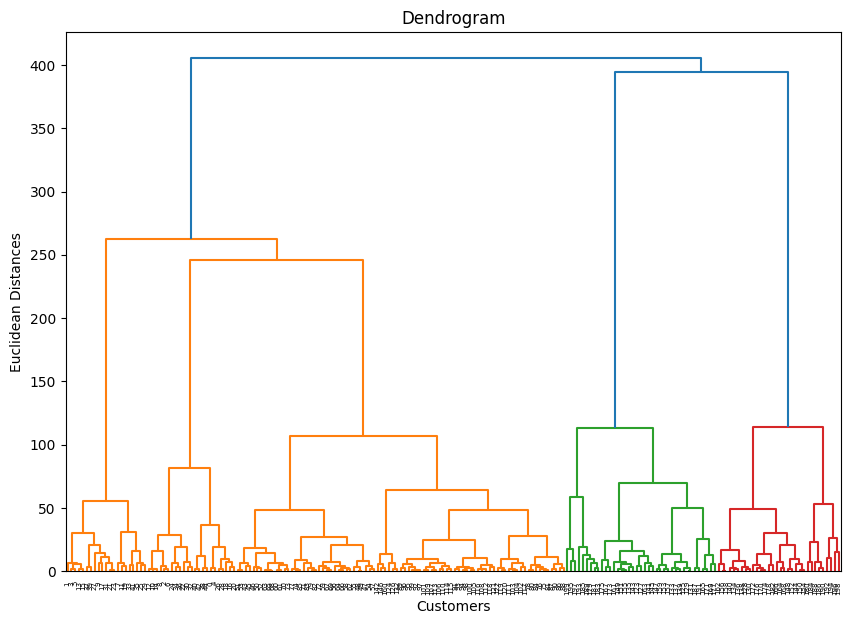

In [ ]:
# This helps in deciding the optimal number of clusters
plt.figure(figsize=(10, 7))
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Euclidean Distances")

# 'ward' method minimizes the variance within clusters
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.show()

## 5. Fit the model



In [ ]:
# Based on the dendrogram, we choose n_clusters=5
hc = AgglomerativeClustering(n_clusters=5, linkage='ward')
y_hc = hc.fit_predict(X)

## 6. Visualize the Clusters

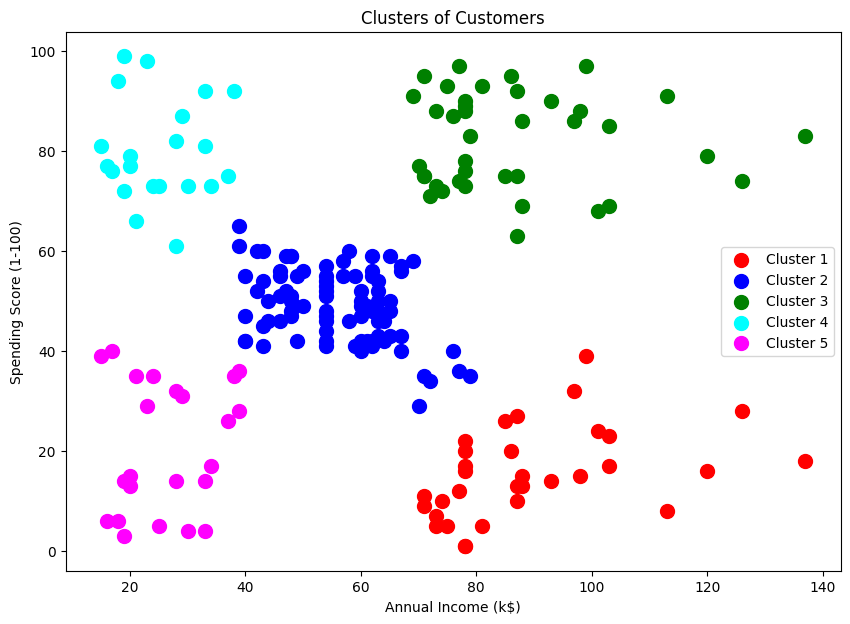

In [ ]:
plt.figure(figsize=(10, 7))

# Plotting each cluster
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s=100, c='magenta', label='Cluster 5')

plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

## 7. Evaluate the model

In [ ]:
score = silhouette_score(X, y_hc)
print("Silhouette Score:", score)

Silhouette Score: 0.5529945955148897


**Insights**:
- Based on the dendrogram plot, 5 clusters are choosen.
- The has observed the Silhouette score of 0.552, indicating that the model has clusters are well-formed.